# **YZ ile Telefon Fiyat Tahmini Uygulaması**

- Bu çalışma Logistic Regression ile kurgulanmıştır.
- Logistic Regression sırasıyla **Yapay Zeka > Makine Öğrenmesi > Gözetimli Öğrenme**'nin alt dallarından birisidir.

  - Logistic Regression ile daha detaylı bilgiler için aşağıdaki linke bakabilirsiniz
    - https://en.wikipedia.org/wiki/Logistic_regression

- Çalışmada Abhishek Sharma'nın "Mobile Price Classification" isimli data seti kullanılmıştır ve çalışma Google Colab üzerinden kurgulanmıştır.

- Çalışmada aşağıdaki kütüphaneler ve OS kullanılmıştır.
  - Python 3.7.10
  - NumPy  1.19.5
  - Pandas 1.1.5
  - OS Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
  - MatPlotLib 3.2.2
  - Seaborn 0.11.1
  - Sklearn 0.22.2.post1

- Çalışmada kullanılan adımlar sırasıyla
  1. Veri setini okunması ve gerekli kütüphanelerin implementasyonu.
  2. Veri setini analiz etme.
    - Veri Seti Analizi
    - Keşifsel Veri Analizi (Exploratory Data Analysis - EDA)
    - Veri Görselleştirme
  3. Veri Ön İşleme
  4. İlgili Modelin Oluşturulması ve Tahminleme
  5. Yorumlar ve Öneriler.

- Anlaşılmayan herhangi bir yer olursa kcemozdemir@gmail.com ile iletişime geçebilirsiniz.

# **1-) Veri seti okuma ve gerekli kütüphaneleri implement etme**

In [61]:
#Öncelikle GDrive'da mobilephones isimli bir klasör açıyoruz ve veri setimizi bu klasöre atıyoruz
#Daha sonra google colab'ı gdrive'a bağlıyoruz
#Sonrasında veri setimizin bulunduğu pathe geçiş yapıyoruz

#Eğer Colab kullanmıyorsanız os.chdir ile veri setinin yolunu işaretleyiniz

import os
os.chdir('/content/drive/MyDrive/mobilephones')
!pwd


/content/drive/MyDrive/mobilephones


In [62]:
#Kullanacağımız kütüphaneleri ekliyoruz
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [63]:
#Kullanacağımız veri seti CSV (Comma Separated Values) türünde olduğu için Pandas altında özelleşmiş csv reader ile veri setimizi okuyuoruz ve ilk 3 veriyi ekrana basıyoruz.
train = pd.read_csv('/content/drive/MyDrive/mobilephones/train.csv')
test = pd.read_csv('/content/drive/MyDrive/mobilephones/train.csv')
train.head(3)      #veri sınırları içerisinde görmek istediğiniz kadar veriye bakabilirsiniz dtype : int

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


# **2-) Veri Setini Analiz Etme**

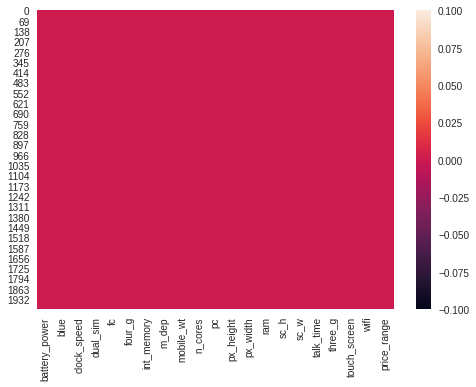

In [64]:
#Eğitim verimizde herhangi eksik değer (missing value) var mı teyit ediyoruz.
train.isnull()
sns.heatmap(train.isnull())

In [65]:
#Eğitim kümemizi dtypes, kayıpdeğer ve kullanılan hafıza miktarı olarak inceliyoruz.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [66]:
#İstatistiksel olarak eğitim kümemize bakıyoruz.
np.transpose(train.describe())

#count : ilgili alan ile ilgili kaç tane veri var
#mean : ortalama
#std : standart sapma
#min,max,%X : ilgili alandaki en küçük, en büyük ve yüzdesel karşılıklar.

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


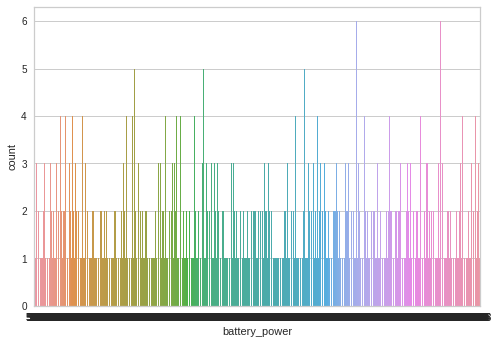

In [67]:
sns.countplot(x=train['battery_power'])

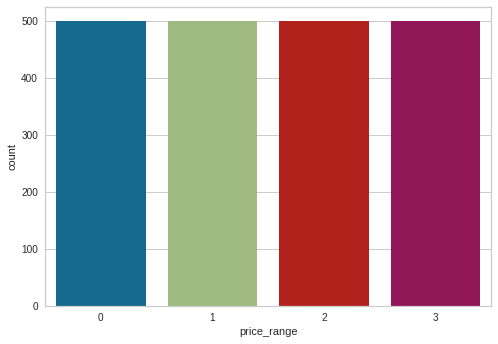

In [68]:
sns.countplot(x=train['price_range'])

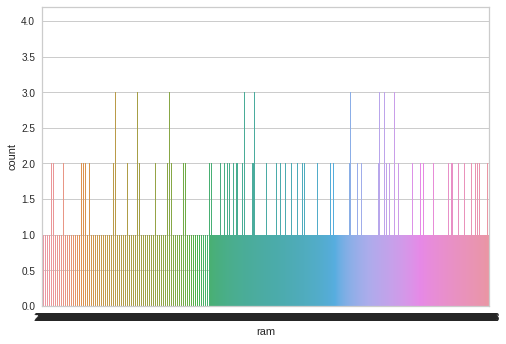

In [69]:
sns.countplot(x=train['ram'])

In [70]:
segment_map = {0 : "Ucuz - Giriş Segmenti", 1 : "Normal - Orta Segment", 2 : "Pahalı - Üst-Orta Segment", 3 : "Çok Pahalı - Üst Segment"}
train['price_range_mapped'] = train['price_range'].map(segment_map)

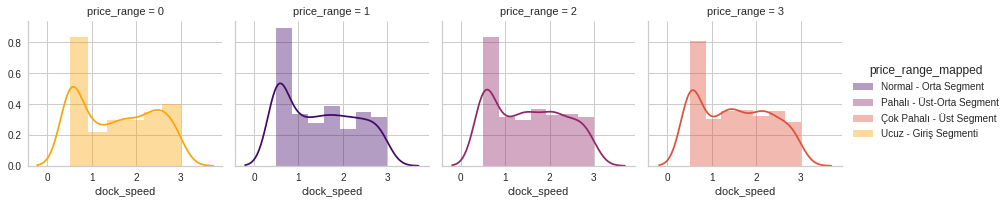

In [71]:
grid = sns.FacetGrid(train, col="price_range", hue="price_range_mapped", palette="inferno",height=3)
grid.map(sns.distplot, "clock_speed").add_legend();

Text(0.5, 1.0, 'Korelasyon')

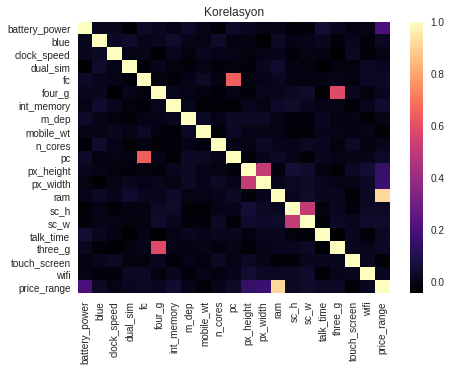

In [72]:
corr=train.corr()
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(corr, cmap='magma')
heatmap.set_title("Korelasyon")

# **3-) Veri Ön İşleme**

In [73]:
features = ['battery_power',
            'blue',
            'clock_speed',
            'dual_sim',
            'fc',
            'four_g',
            'int_memory',
            'm_dep',
            'mobile_wt',
            'n_cores',
            'pc',
            'px_height',
            'px_width',
            'ram',
            'sc_h',
            'sc_w',
            'talk_time',
            'three_g',
            'touch_screen',
            'wifi']

target = ['price_range']

x = train[features].values
y = train[target].values

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state = 24)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4-) İlgili Modelin Oluşturulması ve Tahminleme**

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("Hata Matrisi")
print(lr_conf_matrix)
print("-------------------------------------------")
print(" ")
print("Logistic Regressionun Doğruluk Skoru:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

Hata Matrisi
[[245   9   0   0]
 [  8 220   6   0]
 [  0  26 231   8]
 [  0   0   5 242]]
-------------------------------------------
 
Logistic Regressionun Doğruluk Skoru: 93.8 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       254
           1       0.86      0.94      0.90       234
           2       0.95      0.87      0.91       265
           3       0.97      0.98      0.97       247

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



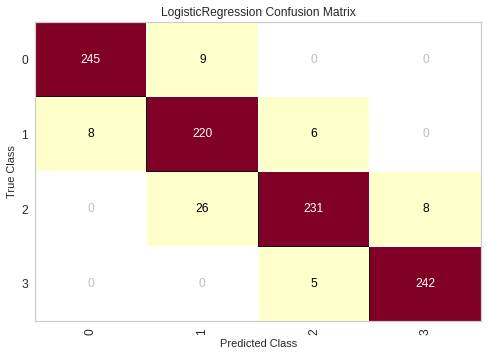

In [78]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    lr, classes=[0,1,2,3]
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.poof()

# **Yorumlar ve Öneriler**

Veri seti küçük olduğu için deep learning tercih edilmemiştir.

Yukarıdaki ilgili çıktılara bakıldığında Logistic Regression 93.8 doğruluk skoruyla tahminleme yapabilmektedir.

Doğruluk Skorunu artırmak için daha seti bölütlerken (ayırırken, split ederken) kullanılan test_size düşürülebilir.

Hata Matrisi incelendiğinde tahminlemede belli anomaliler vardır bunun sebebi özniteliklerin alt ve üst segmentteki cihazların özniteliklerine yakın olmasıdır.

İnce ayarları yapıldığında %100 acc. yakalanabilir fakat modelin açıklanabilirliğini düşürür yani karmaşıklığını artırır.


Herhangi bir soru ve/veya sorunda kcemozdemir@gmail.com ile iletişime geçebilirsiniz.